# Shark Attacks - Project 2

## About:
    Our goal for the analysis of the dataset was focused on identifying the statistics related to the reported attack's country, year/decade, sex of the victim and if the incident was fatal.
    
    Due to the lack of some information, we had to create some assumptions during our analysis, which are documented on the step we encountered the aforementioned absence of information.

## The team:
    André Park - https://github.com/andre-park
    Felipe Oda - https://github.com/fk-oda

Importing the libraries for the development of the project.

In [326]:
import pandas as pd
import numpy as np
import re

Reading the database attacks.csv from kaggle with latin_1 encoding, this is a global file so it should have special characters.

In [327]:
attacks = pd.read_csv('attacks.csv', encoding = 'latin_1')

In [328]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [329]:
attacks.shape

(25723, 24)

## Data cleaning

### Standardizing the column names.

In [330]:
attacks.columns = [column.split(' ')[0].lower() for column in attacks.columns]
attacks.columns

Index(['case', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator', 'pdf', 'href', 'href', 'case', 'case', 'original',
       'unnamed:', 'unnamed:'],
      dtype='object')

### Assigning new dataframe with only the columns of interest.

In [331]:
df = attacks.loc[:,['date', 'year', 'country', 'activity', 'name', 'sex', 'fatal']]

### Removing empty rows.

In [332]:
empty_rows = df.isna().all(axis = 1)
empty_rows.sum()

19421

In [333]:
df.loc[empty_rows,:]

,date,year,country,activity,name,sex,fatal
6302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 19421 rows that are completely empty. Drop them.

In [334]:
df = df.drop(index = df.loc[empty_rows,:].index)
df.shape

(6302, 7)

### Removing duplicated rows.

In [335]:
df.duplicated().sum()

12

In [336]:
df = df.drop_duplicates()

In [337]:
df.sample(10)

,date,year,country,activity,name,sex,fatal
2827,07-Feb-1986,1986.0,SOUTH AFRICA,Swimming,Johan Fourie,M,N
3519,Aug-1967,1967.0,BAHAMAS,Photographing sharks underwater using Scuba,Richard Winer,M,N
4070,15-Aug-1959,1959.0,USA,Spearfishing on Scuba,Lt. James C. Neal,M,Y
647,29-Jul-2013,2013.0,MEXICO,Wading,Bonnie Davis,F,N
2403,1995,1995.0,USA,Scuba diving,Nunley,M,NaN
1525,24-Nov-2005-,2005.0,NEW CALEDONIA,Spearfishing,Emile,NaN,N
3773,Jan-1963,1963.0,MOZAMBIQUE,NaN,"Canoe, occupant: Jopie Averes",NaN,N
5716,21-Jul-1889,1889.0,USA,Swimming,Eddie Roe,M,Y
716,19-Dec-2012,2012.0,AUSTRALIA,Surfing,Richard Wands,M,N
5378,01-Jan-1912,1912.0,AUSTRALIA,Bathing,Samuel Tristing,M,Y


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6290 entries, 0 to 6301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6290 non-null   object 
 1   year      6288 non-null   float64
 2   country   6240 non-null   object 
 3   activity  5747 non-null   object 
 4   name      6080 non-null   object 
 5   sex       5727 non-null   object 
 6   fatal     5751 non-null   object 
dtypes: float64(1), object(6)
memory usage: 393.1+ KB


### Cleaning 'year' column.

In [339]:
df.year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [340]:
strange_years = (df.year == 500) | (df.year == 77)| (df.year == 5)
df.loc[strange_years,:]

,date,year,country,activity,name,sex,fatal
6174,Circa 500 A.D.,500.0,MEXICO,NaN,male,M,N
6175,77 A.D.,77.0,NaN,Sponge diving,males,M,Y
6176,Ca. 5 A.D.,5.0,AUSTRALIA,NaN,male,M,N


In [341]:
df.drop(index = df.loc[strange_years,:].index)

,date,year,country,activity,name,sex,fatal
0,25-Jun-2018,2018.0,USA,Paddling,Julie Wolfe,F,N
1,18-Jun-2018,2018.0,USA,Standing,Adyson McNeely,F,N
2,09-Jun-2018,2018.0,USA,Surfing,John Denges,M,N
3,08-Jun-2018,2018.0,AUSTRALIA,Surfing,male,M,N
4,04-Jun-2018,2018.0,MEXICO,Free diving,Gustavo Ramos,M,N
...,...,...,...,...,...,...,...
6297,Before 1903,0.0,AUSTRALIA,Diving,male,M,Y
6298,Before 1903,0.0,AUSTRALIA,Pearl diving,Ahmun,M,Y
6299,1900-1905,0.0,USA,Swimming,Coast Guard personnel,M,Y
6300,1883-1889,0.0,PANAMA,NaN,Jules Patterson,M,Y


In [342]:
df.date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1900-1905',
       '1883-1889', '1845-1853'], dtype=object)

Check the rows with year value as NaN or zero.

In [343]:
missing_year = (df.year.isna())|(df.year == 0)
df.loc[missing_year,:]

,date,year,country,activity,name,sex,fatal
187,Reported 08-Jan-2017,NaN,AUSTRALIA,Spearfishing,Kerry Daniel,M,NaN
6079,Reported 19-Aug-1836,NaN,ENGLAND,Swimming,a boy,M,Y
6177,Ca. 214 B.C.,0.0,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,Y
6178,Ca. 336.B.C..,0.0,GREECE,Washing his pig in preparation for a religious...,A candidate for initiation,M,Y
6179,493 B.C.,0.0,GREECE,Shipwrecked Persian Fleet,males,M,Y
...,...,...,...,...,...,...,...
6297,Before 1903,0.0,AUSTRALIA,Diving,male,M,Y
6298,Before 1903,0.0,AUSTRALIA,Pearl diving,Ahmun,M,Y
6299,1900-1905,0.0,USA,Swimming,Coast Guard personnel,M,Y
6300,1883-1889,0.0,PANAMA,NaN,Jules Patterson,M,Y


Transform the column 'date' type to str so we can check/filter the pattern of intervals.

In [344]:
df.date.astype(str)

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
Name: date, Length: 6290, dtype: object

Fill the column year(rows with interval in date) with the last year available of the interval.

In [345]:
interval_pattern = df['date'].str.contains('\d\d\d\d\s?-\s?\d\d\d\d')
df.loc[interval_pattern,'year'] = df.loc[interval_pattern,
                        'date'].apply(lambda x: re.findall('\d{4}', x)[-1])

In [346]:
df.loc[interval_pattern, :]

,date,year,country,activity,name,sex,fatal
4029,1960-1961,1961,FIJI,Spearfishing,Lindsay Phillips,M,N
4172,1958-1959,1959,TONGA,Spearfishing,male,M,N
4418,1952-1954,1954,LIBERIA,"Diving, recovering fish killed by dynamite",male,M,Y
4488,1950 - 1951,1951,LIBERIA,Defecating in water beneath the docks,a dock worker,M,Y
4522,1949-1950,1950,ITALY,"Fishing, on a boat",male,M,N
5212,1923-1924,1924,PHILIPPINES,NaN,male,M,Y
5602,1898-1899,1899,USA,NaN,boy,M,N
6189,1880-1899,1899,AUSTRALIA,NaN,Lassie,F,N
6193,Between 1951-1963,1963,GREECE,Swimming,Martha Hatagouei,F,Y
6203,1896-1913,1913,LIBYA,Sponge diving,a diver from Kalymnos,M,Y


In [347]:
df.loc[df.date.str.contains('[Bb]efore', regex = True),:]

,date,year,country,activity,name,sex,fatal
5863,Before 1878,1877,INDIA,NaN,Indian,M,N
5909,Before 1871,1871,AUSTRALIA,NaN,male,M,N
5910,Before 1871,1871,AUSTRALIA,Fishing,"2 males, aborigines",M,N
6181,Before 1939,0,CANADA,Fishing,Joe Folsom,M,N
6183,Before 2016,0,KENYA,Diving,Hamisi Njenga,M,Y
...,...,...,...,...,...,...,...
6293,Before 1906,0,AUSTRALIA,Fishing,boy,M,Y
6294,Before 1906,0,AUSTRALIA,Fishing,fisherman,M,Y
6296,Before 1906,0,AUSTRALIA,Swimming,Arab boy,M,Y
6297,Before 1903,0,AUSTRALIA,Diving,male,M,Y


In [348]:
df.loc[df.date.str.contains('[Bb]efore .*\d{4}', regex = True), 
       'date'].unique()

array(['Before 1878', 'Before 1871', 'Before 1939', 'Before 2016',
       'Before Oct-2009', 'Before 1934', 'Before 1930', 'Before 1909',
       'Before 2012', 'Before 1916', 'Before 1908', 'Before 1900',
       'Before 1876', 'Before 2011', 'Before 2009', 'Before 1963',
       'Before 1936', 'Before 08-Jun-1912', 'Before 1911', 'Before 1901',
       'Before 2006', 'Before 2003', 'Before 2004', 'Before 1962',
       'No date, Before 1963', 'Before Feb-1998',
       'No date, Before May-1996', 'No date, Before Mar-1995',
       'Before 1996', 'No date, Before Aug-1989',
       'No date, Before Aug-1987', 'No date, Before 1987',
       'No date, Before  1975', 'No date, Before 1975',
       'No date, Before 1969', 'No date, Before 3-Jan-1967',
       'No date, Before 8-May-1965', 'No date, Before 1902',
       'No date, After August 1926 and before 1936', 'Before 1961',
       'Before 1960', 'Before  19-Jun-1959', 'Before  24 Apr-1959',
       'Before  1958', 'Before 1958', 'Before 1957'

In [349]:
before_pattern = df.date.str.contains('[Bb]efore.*\d{4}', regex = True)

In [350]:
df.loc[before_pattern,'year'] = df.loc[before_pattern, 
                                       'date'].apply(lambda x : int(re.findall('\d{4}', x)[0]) - 1)

In [351]:
df.loc[before_pattern,'year']

5863    1877
5909    1870
5910    1870
6181    1938
6183    2015
        ... 
6293    1905
6294    1905
6296    1905
6297    1902
6298    1902
Name: year, Length: 85, dtype: object

In [352]:
before_pattern1 = df.date.str.contains('[Bb]efore', regex = True)

In [353]:
df.loc[(df['year'].isnull()) | (df['year'] == 0),'date']

187                                  Reported 08-Jan-2017
6079                                 Reported 19-Aug-1836
6177                                         Ca. 214 B.C.
6178                                        Ca. 336.B.C..
6179                                             493 B.C.
6180                                         Ca. 725 B.C.
6182                                         1990 or 1991
6187                                                2009?
6209                                  No date, late 1960s
6214                                                1950s
6216                                                2003?
6217                                              No date
6218                                              No date
6241                                                1960s
6242                                                1960s
6243                                                1960s
6261                                     "Before the war"
6271          

In [354]:
before_christ = df.date.str.contains('B\.C', case = False, regex= True)

In [355]:
df.loc[before_christ,:]

,date,year,country,activity,name,sex,fatal
6177,Ca. 214 B.C.,0,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,Y
6178,Ca. 336.B.C..,0,GREECE,Washing his pig in preparation for a religious...,A candidate for initiation,M,Y
6179,493 B.C.,0,GREECE,Shipwrecked Persian Fleet,males,M,Y
6180,Ca. 725 B.C.,0,ITALY,Shipwreck,males,M,Y


In [356]:
df = df.drop(index = df.loc[before_christ,:].index)

Mask to filter data left with the column year null or zero that contains 4 digits.

In [357]:
null_or_0 = (df['year'].isnull()) | (df['year'] == 0)
year_pattern = (df.date.str.contains('\d{4}', regex = True))
df.loc[null_or_0 & year_pattern ,'date']

187                                  Reported 08-Jan-2017
6079                                 Reported 19-Aug-1836
6182                                         1990 or 1991
6187                                                2009?
6209                                  No date, late 1960s
6214                                                1950s
6216                                                2003?
6241                                                1960s
6242                                                1960s
6243                                                1960s
6276                                          Early 1930s
6278                                  Between 1918 & 1939
6289    No date (3 days after preceding incident) & pr...
6292                                           Circa 1862
Name: date, dtype: object

In [358]:
df.loc[null_or_0 & year_pattern ,'year'] = df.loc[null_or_0 & year_pattern ,
                                                  'date'].apply(lambda x: re.findall('\d{4}',x)[-1])

In [359]:
df.loc[null_or_0 & year_pattern ,['date','year']]

,date,year
187,Reported 08-Jan-2017,2017
6079,Reported 19-Aug-1836,1836
6182,1990 or 1991,1991
6187,2009?,2009
6209,"No date, late 1960s",1960
6214,1950s,1950
6216,2003?,2003
6241,1960s,1960
6242,1960s,1960
6243,1960s,1960


These rows do not have any information about the year so we maintain the values as zeros.

In [360]:
df.loc[df['year'] == 0, :]

,date,year,country,activity,name,sex,fatal
6217,No date,0,USA,Kitesurfing,Paul Menta,M,N
6218,No date,0,REUNION,yachtsman in a zodiac,NaN,M,N
6261,"""Before the war""",0,AUSTRALIA,Free diving,Mortakee,M,N
6271,World War II,0,PAPUA NEW GUINEA,Spent 8 days in dinghy,pilot,M,N
6272,World War II,0,PAPUA NEW GUINEA,"Aircraft ditched in the sea, swimming ashore",male,M,N
6275,No date,0,GREECE,Sponge diving,Psarofa-gomenes,M,N
6279,No date,0,SOUTH AFRICA,Wading,Madelaine Dalton,F,N
6280,No date,0,AUSTRALIA,Pearl diving,Jaringoorli,M,N
6281,No date,0,SOUTH AFRICA,Swimming in pool formed by construction of a w...,Indian boy,M,Y


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6286 entries, 0 to 6301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6286 non-null   object
 1   year      6286 non-null   object
 2   country   6237 non-null   object
 3   activity  5743 non-null   object
 4   name      6076 non-null   object
 5   sex       5723 non-null   object
 6   fatal     5747 non-null   object
dtypes: object(7)
memory usage: 392.9+ KB


### Cleaning 'country' column.

In [362]:
df.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [363]:
df.country = df.country.apply(lambda x: x.upper() if type(x) == str else x )

In [364]:
df.loc[df['country'].isna(),:] 

,date,year,country,activity,name,sex,fatal
62,Reported 13-Nov-2017,2017,NaN,Surfing,Timur Yunusov,M,N
525,Aug-2014,2014,NaN,Sea disaster,Cuban refugees,M,NaN
2956,Ca. 1983,1983,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,N
3378,Nov-1970,1970,NaN,NaN,Heinz Plotsky,M,N
3387,02-Aug-1970,1970,NaN,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN
3388,5-Jul-1970,1970,NaN,NaN,male,M,N
3395,Apr-1970,1970,NaN,Freediving,Lionel Jarvis,M,N
3399,5-Feb-1970,1970,NaN,Wading,Sally Anne Irvine,F,N
3425,Aug-1969,1969,NaN,NaN,Rodney Hughes,M,N
3605,21-Oct-1965,1965,NaN,The boat Caribou II sank,Mario Castellanos,M,N


Rows with the column country null were filled by 'Undefined', because there ain't enought information.

In [365]:
df.loc[df['country'].isna(),'country'] = 'UNDEFINED' 

In [366]:
df.groupby(by = 'country').date.count().sort_values(ascending = False).head(30)

country
USA                 2222
AUSTRALIA           1337
SOUTH AFRICA         578
PAPUA NEW GUINEA     132
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 70
FIJI                  65
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
UNDEFINED             49
CUBA                  46
MOZAMBIQUE            45
SPAIN                 44
INDIA                 39
EGYPT                 38
JAPAN                 34
CROATIA               34
PANAMA                32
SOLOMON ISLANDS       30
IRAN                  29
JAMAICA               27
FRENCH POLYNESIA      25
HONG KONG             24
ENGLAND               23
INDONESIA             23
GREECE                23
Name: date, dtype: int64

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6286 entries, 0 to 6301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6286 non-null   object
 1   year      6286 non-null   object
 2   country   6286 non-null   object
 3   activity  5743 non-null   object
 4   name      6076 non-null   object
 5   sex       5723 non-null   object
 6   fatal     5747 non-null   object
dtypes: object(7)
memory usage: 392.9+ KB


### Cleaning 'fatal' column.

In [368]:
df.fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [369]:
unknown = df.fatal == 'UNKNOWN'
df.loc[unknown, :]

,date,year,country,activity,name,sex,fatal
624,08-Sep-2013,2013,USA,NaN,female,F,UNKNOWN
1270,20-Apr-2008,2008,AUSTRALIA,NaN,Jamie Adlington,M,UNKNOWN
2250,07-Jun-1997,1997,BRAZIL,Bathing,José Luiz Lipiani,M,UNKNOWN
2260,21-Feb-1997,1997,USA,NaN,Gersome Perreno,M,UNKNOWN
2267,29-Dec-1996,1996,AUSTRALIA,Surfing,Blair Hall,M,UNKNOWN
...,...,...,...,...,...,...,...
6167,Reported 1617,1617,INDIA,NaN,Indian people,NaN,UNKNOWN
6169,1595,1595,INDIA,Ship lay at anchor & man was working on its ru...,male,M,UNKNOWN
6171,1555,1555,UNDEFINED,Swimming,male,M,UNKNOWN
6172,Ca. 1554,1554,FRANCE,NaN,males (wearing armor),M,UNKNOWN


In [370]:
missing = df.fatal.isna()
df.loc[missing, :]

,date,year,country,activity,name,sex,fatal
27,15-Apr-2018,2018,BRAZIL,Swimming,Pablo de Melo,M,NaN
76,01-Oct-2017,2017,SOUTH AFRICA,Scuba Diving,Bradley Fick,M,NaN
79,24-Sep-2017,2017,USA,Surfing,Michah Behrend,M,NaN
84,15-Sep-2017,2017,SOUTH AFRICA,Scuba Diving,Wayon Love,M,NaN
98,26-Aug-2017,2017,SPAIN,Swimming,female,F,NaN
...,...,...,...,...,...,...,...
6147,1767,1767,FRANCE,Bathing,Samuel Matthews,M,NaN
6157,1733,1733,ICELAND,NaN,NaN,NaN,NaN
6158,1723,1723,ROATAN,NaN,Philip Ashton,M,NaN
6164,Late 1600s Reported 1728,1642,GUINEA,Went overboard,crew member of the Nieuwstadt,M,NaN


Standardizing the values of the column fatal and inputing 'UNKNOWN' for the null values, as we are unable to infer if the incident was fatal or not.

In [371]:
df.fatal = df.fatal.apply(lambda x: x.upper().strip() if type(x) == str else 'UNKNOWN')

In [372]:
df.fatal.unique()

array(['N', 'Y', 'UNKNOWN', 'M', '2017'], dtype=object)

In [373]:
strange_values = (df.fatal == 'M') | (df.fatal == '2017')
df.loc[strange_values,:]

,date,year,country,activity,name,sex,fatal
285,18-Apr-2016,2016,FRENCH POLYNESIA,Spearfishing,Hoata Iotua,M,M
786,10-Jun-2012,2012,ITALY,Attempting to rescue an injured & beached shark,Giorgio Zara,M,2017


Due to the lack of information we will consider thoses cases as 'UNKNOWN'.

In [374]:
df.loc[strange_values,'fatal'] = 'UNKNOWN'

### Cleaning 'sex' column.

In [375]:
df.sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [376]:
missing_sex = df.sex.isna()
df.loc[missing_sex,:]

,date,year,country,activity,name,sex,fatal
32,09-Apr-2018,2018,NEW CALEDONIA,Windsurfing,NaN,NaN,N
59,Reported 25-Nov-2017,2017,LIBYA,2 boats capsized,31 migrants,NaN,Y
86,Sep-2017,2017,AUSTRALIA,Fishing,NaN,NaN,N
124,02-Jul-2017,2017,COMOROS,Fishing,NaN,NaN,UNKNOWN
154,17-Apr-2017,2017,USA,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...
6212,Before 2004,2003,MOZAMBIQUE,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",NaN,N
6237,"No date, Before 1963",1962,SINGAPORE,Swimming,NaN,NaN,N
6259,1941-1945,1945,UNDEFINED,A group of survivors on a raft for 17-days,C.,NaN,Y
6278,Between 1918 & 1939,1939,REUNION,Swimming,NaN,NaN,Y


In [377]:
df.sex = df.sex.apply(lambda x: x.strip() if type(x) == str else 'UNKNOWN')

In [378]:
strange_sex = (df.sex == 'lli')|(df.sex == 'N')|(df.sex == '.')
df.loc[strange_sex,:]

,date,year,country,activity,name,sex,fatal
1624,11-Nov-2004,2004,USA,Surfing,Brian Kang,lli,N
4938,11-Jul-1934,1934,AUSTRALIA,Fishing,"18' boat, occupants William & Leslie Newton",N,N
5437,Reported 02-Jun-1908,1908,PAPUA NEW GUINEA,.,NaN,.,Y
6131,Reported 18-Dec-1801,1801,UNDEFINED,Standing on landed shark's tail,Stephen Pettigew,N,Y


We assume that 'Brian' and 'Stephen' are male names.

In [379]:
brian_stephen = (df.name == 'Brian Kang')|(df.name == 'Stephen Pettigew')
df.loc[brian_stephen, 'sex'] = 'M'

Due to the lack of information we will consider thoses cases as 'UNKNOWN'.

In [380]:
unknown_sex = (df.sex == 'N')|(df.sex == '.')
df.loc[unknown_sex, 'sex'] = 'UNKNOWN'

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6286 entries, 0 to 6301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6286 non-null   object
 1   year      6286 non-null   object
 2   country   6286 non-null   object
 3   activity  5743 non-null   object
 4   name      6076 non-null   object
 5   sex       6286 non-null   object
 6   fatal     6286 non-null   object
dtypes: object(7)
memory usage: 392.9+ KB


## Data Analysis

In [382]:
df.describe()

,date,year,country,activity,name,sex,fatal
count,6286,6286.0,6286,5743,6076,6286,6286
unique,5429,274.0,210,1529,5228,3,3
top,1957,2015.0,USA,Surfing,male,M,N
freq,11,144.0,2222,966,543,5084,4292


### Analysis of incidents per sex

In [383]:
ds_sex = df.groupby('sex').count()['year'] / df.groupby('sex').count()['year'].sum() * 100
ds_sex.sort_values(ascending=False)

sex
M          80.878142
F          10.133630
UNKNOWN     8.988228
Name: year, dtype: float64

Regarding the sex of the victims, we concluded that:
<ul>
    <li><b>80.88%</b> were male,</li>
    <li><b>10.13%</b> were female,</li>
    <li><b>8.99%</b> did not have the sex reported.</li>
</ul>

In [384]:
[print('{}: {} % of total cases.'.format(x,round(ds_sex[x],2))) for x in ds_sex.index]

F: 10.13 % of total cases.
M: 80.88 % of total cases.
UNKNOWN: 8.99 % of total cases.


[None, None, None]

### Analysis of incidents per mortality

In [385]:
ds_fatal = df.groupby('fatal').count()['year'] / df.groupby('fatal').count()['year'].sum() * 100
ds_fatal.sort_values(ascending=False)

fatal
N          68.278715
Y          22.001273
UNKNOWN     9.720013
Name: year, dtype: float64

In connection with the mortality, we concluded that
:
<ul>
    <li><b>68.28%</b> were not fatal,</li>
    <li><b>9.72%</b> were fatal,</li>
    <li><b>22.0%</b> did not have the information.</li>
</ul>

In [386]:
[print('{}: {} % of total cases.'.format(x,round(ds_fatal[x],2))) for x in ds_fatal.index]

N: 68.28 % of total cases.
UNKNOWN: 9.72 % of total cases.
Y: 22.0 % of total cases.


[None, None, None]

### Combined analysis of incidents per sex and mortality

In [387]:
def format_message(s):
    if s == 'N':
        return 'Not fatal'
    elif s == 'Y':
        return 'Fatal'
    else:
        return 'Not reported'

ds_sex_fatal = df.groupby(['sex', 'fatal'],as_index=False).count()
df_sex_fatal = pd.DataFrame(ds_sex_fatal)
ds_t = df_sex_fatal.groupby('sex')['year'].sum()
print('---------------')
ds_f = df_sex_fatal.loc[df_sex_fatal['sex'] == 'F'].groupby('fatal')['year'].sum()
print('For female victms:')
[print('{}: {} % of total cases.'.format(format_message(x), round(ds_f[x]/ ds_t[0] * 100,2))) for x in ds_f.index]
print('---------------')
ds_m = df_sex_fatal.loc[df_sex_fatal['sex'] == 'M'].groupby('fatal')['year'].sum()
print('For male victms:')
[print('{}: {} % of total cases.'.format(format_message(x), round(ds_m[x]/ ds_t[1] * 100,2))) for x in ds_m.index]
print('---------------')
ds_u = df_sex_fatal.loc[df_sex_fatal['sex'] == 'UNKNOWN'].groupby('fatal')['year'].sum()
print('For victms without sex reported:')
[print('{}: {} % of total cases.'.format(format_message(x), round(ds_u[x]/ ds_t[2] * 100,2))) for x in ds_u.index]

---------------
For female victms:
Not fatal: 73.47 % of total cases.
Not reported: 9.73 % of total cases.
Fatal: 16.8 % of total cases.
---------------
For male victms:
Not fatal: 68.37 % of total cases.
Not reported: 8.65 % of total cases.
Fatal: 22.97 % of total cases.
---------------
For victms without sex reported:
Not fatal: 61.59 % of total cases.
Not reported: 19.29 % of total cases.
Fatal: 19.12 % of total cases.


[None, None, None]

### Analysis of incidents per decade

In [388]:
mask_1500 = df['year'].astype(int) <= 1500
df.loc[mask_1500,:]

,date,year,country,activity,name,sex,fatal
6174,Circa 500 A.D.,500,MEXICO,NaN,male,M,N
6175,77 A.D.,77,UNDEFINED,Sponge diving,males,M,Y
6176,Ca. 5 A.D.,5,AUSTRALIA,NaN,male,M,N
6217,No date,0,USA,Kitesurfing,Paul Menta,M,N
6218,No date,0,REUNION,yachtsman in a zodiac,NaN,M,N
6261,"""Before the war""",0,AUSTRALIA,Free diving,Mortakee,M,N
6271,World War II,0,PAPUA NEW GUINEA,Spent 8 days in dinghy,pilot,M,N
6272,World War II,0,PAPUA NEW GUINEA,"Aircraft ditched in the sea, swimming ashore",male,M,N
6275,No date,0,GREECE,Sponge diving,Psarofa-gomenes,M,N
6279,No date,0,SOUTH AFRICA,Wading,Madelaine Dalton,F,N


In [389]:
df['year'] = df['year'].astype(int)

In [390]:
df['decades'] = df['year'].apply(lambda x: str(x)[:3] + '0' if len(str(x)) == 4 else '0')

In [391]:
ds_decades = df.loc[df['decades'] != '0',:].groupby('decades')['year'].count()

In [392]:
import matplotlib.pyplot as plt

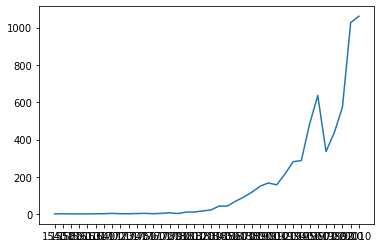

In [393]:
plt.plot(ds_decades)

In [394]:
ds_decades

decades
1540       1
1550       2
1580       1
1590       1
1610       1
1630       2
1640       2
1700       4
1720       2
1730       2
1740       3
1750       4
1760       2
1770       4
1780       7
1790       3
1800      11
1810      11
1820      17
1830      22
1840      43
1850      43
1860      69
1870      91
1880     118
1890     150
1900     167
1910     157
1920     214
1930     281
1940     287
1950     482
1960     636
1970     336
1980     436
1990     574
2000    1027
2010    1061
Name: year, dtype: int64

According to our observation, the increase on the numbers of incidents reported almost doubled in the turn of 20th century 
due to the popularization of internet access and personal computers.

## Final Output - Exporting final DataFrame to csv file.

In [395]:
df.to_csv('final_df.csv', index = False)